#Image classification

Creating an image classifier for the Cifar10 dataset using tensorflow and keras.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.insert(0,"/content/gdrive/MyDrive/data_science_projects/data_science_projects_2022/cifar10_image_classification/modules/")

In [3]:
%load_ext autoreload
%autoreload 2

from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline
from image_classification_model import create_model, compile_model, compile_model2, train_model
from model_evaluation import evaluate_model, return_confusion_matrix
from model_details import model_summary, plot_metrics

from tensorflow.keras.layers import Conv2D, Dense, Input, Flatten, Dropout, MaxPooling2D
from tensorflow import keras


In [ ]:
def main ():
    def set_function_parameters (model_layers = {},
                                 compiler_parameters = {},
                                 fit_parameters = {},
                                 evaluation_parameters = {},
                                 prediction_parameters = {},
                                 matrix_parameters = {}):
        from tensorflow.keras.datasets import cifar10

        data_model = create_pipeline ([get_data, 
                                       get_train_test_data,
                                       normalise_data, 
                                       create_model (**model_layers), 
                                       compile_model2 (**compiler_parameters), 
                                       train_model (**fit_parameters), 
                                       evaluate_model (**evaluation_parameters),
                                       return_confusion_matrix (prediction_parameters, matrix_parameters),
                                       plot_metrics
                                       ])
        
        #   return_confusion_matrix has two dictionaries as function parameters.
        #   So, prediction_parameters and matrix_parameters must be maintained
        #   as dictionaries and not unpacked like the other functions in the 
        #   pipeline. 
        #   The other functions take one set of arbitrary keyword arguments all 
        #   represented by a single parameter using the **kwargs syntax.
        #   The return_confusion_matrix function required two separate sets of 
        #   arbitrary keyword arguments. To achieve this, each set of arguments 
        #   was separated between two parameters as dictionaries (since you
        #   cannot have two **kwargs). So, since return_confusion_matrix has two
        #   dictionaries as its function parameters, the dictionaries for 
        #   set_function_parameters are not unpacked directly into the 
        #   return_confusion_matrix function. Instead, once the dictionaries
        #   are passed to the function, they are unpacked when they are called
        #   inside the function itself.

        data_n_model = data_model (cifar10)

        return data_n_model
    
    return set_function_parameters

Model compiled for compile_model2
Start model training.
Epoch 1/5
1250/1250 [==============================] - 140s 112ms/step - loss: 1.7289 - sparse_categorical_accuracy: 0.3710 - val_loss: 1.3796 - val_sparse_categorical_accuracy: 0.5216
Epoch 2/5
1250/1250 [==============================] - 140s 112ms/step - loss: 1.4236 - sparse_categorical_accuracy: 0.4827 - val_loss: 1.2378 - val_sparse_categorical_accuracy: 0.5552
Epoch 3/5
1250/1250 [==============================] - 139s 111ms/step - loss: 1.3198 - sparse_categorical_accuracy: 0.5258 - val_loss: 1.1349 - val_sparse_categorical_accuracy: 0.6138
Epoch 4/5
1250/1250 [==============================] - 140s 112ms/step - loss: 1.2390 - sparse_categorical_accuracy: 0.5556 - val_loss: 1.0741 - val_sparse_categorical_accuracy: 0.6227
Epoch 5/5
1250/1250 [==============================] - 137s 110ms/step - loss: 1.1741 - sparse_categorical_accuracy: 0.5784 - val_loss: 1.0562 - val_sparse_categorical_accuracy: 0.6311
Completed model tra

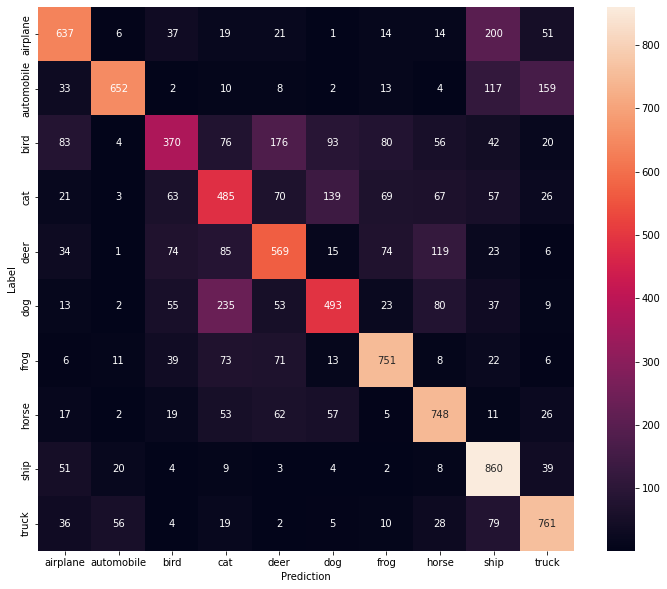

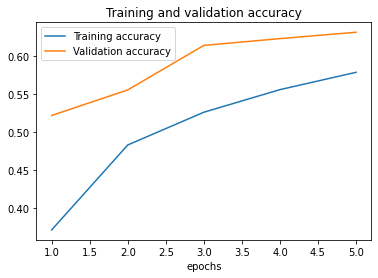

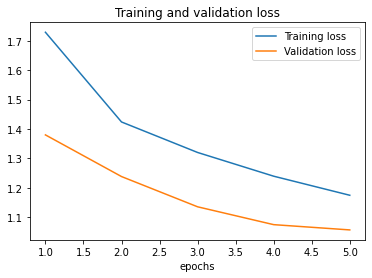

In [ ]:
test_run = main () (model_layers = {'input_layer': Input (shape = (32, 32, 3)),
                                    'hidden_layers': [Conv2D (32, kernel_size = (3, 3), activation = "relu"),
                                                    Conv2D (64, kernel_size = (3, 3), activation = "relu"),
                                                    MaxPooling2D (pool_size = (2, 2)),
                                                    Dropout (0.25),
                                                    Flatten (),
                                                    Dense (64, activation = "relu"),
                                                    Dropout (0.5),
                                                    Dense (10, activation = "softmax")
                                                    ]
                                    },
                    compiler_parameters = {'optimizer': "Adam",
                                         'loss': "sparse_categorical_crossentropy",
                                         'metrics': ["sparse_categorical_accuracy"]
                                         },
                    fit_parameters = {'batch_size': 32,
                                    'epochs': 5,
                                    'validation_split': 0.2
                                    }
                    )

This function runs automatically once the parameters are set.

In [ ]:
def main2 ():
    '''Create pipeline.'''
    def set_function_parameters (model_layers = {},
                                 compiler_parameters = {},
                                 fit_parameters = {},
                                 evaluation_parameters = {},
                                 prediction_parameters = {},
                                 matrix_parameters = {}):
        '''Set model parametres.'''
        def run_pipeline ():
            '''Delay running pipeline until function is called.'''
            from tensorflow.keras.datasets import cifar10

            data_model = create_pipeline ([get_data,
                                           get_train_test_data,
                                           normalise_data,
                                           create_model (**model_layers),
                                           compile_model2 (**compiler_parameters),
                                           train_model (**fit_parameters),
                                           evaluate_model (**evaluation_parameters),
                                           return_confusion_matrix (prediction_parameters, matrix_parameters),
                                           plot_metrics
                                           ])
            
            data_n_model = data_model (cifar10)

            return data_n_model
        
        return run_pipeline
    
    return set_function_parameters

In [ ]:
test_run2 = main2 () (model_layers = {'input_layer': Input (shape = (32, 32, 3)),
                                      'hidden_layers': [Conv2D (32, kernel_size = (3, 3), activation = "relu"),
                                                        Conv2D (64, kernel_size = (3, 3), activation = "relu"),
                                                        MaxPooling2D (pool_size = (2, 2)),
                                                        Dropout (0.25),
                                                        Flatten (),
                                                        Dense (64, activation = "relu"),
                                                        Dropout (0.5),
                                                        Dense (10, activation = "softmax")
                                                        ]
                                      },
                      compiler_parameters = {'optimizer': "Adam",
                                           'loss': "sparse_categorical_crossentropy",
                                           'metrics': ["sparse_categorical_accuracy"]
                                           },
                      fit_sparameters = {'batch_size': 32,
                                      'epochs': 5,
                                      'validation_split': 0.2
                                      }
                      )

In [ ]:
type (test_run2)

function

In [ ]:
def run_function (func):
    func ()

Model compiled for compile_model2
Start model training.
Epoch 1/5
1250/1250 [==============================] - 139s 111ms/step - loss: 1.7902 - sparse_categorical_accuracy: 0.3359 - val_loss: 1.4908 - val_sparse_categorical_accuracy: 0.4844
Epoch 2/5
1250/1250 [==============================] - 139s 111ms/step - loss: 1.5331 - sparse_categorical_accuracy: 0.4362 - val_loss: 1.3202 - val_sparse_categorical_accuracy: 0.5526
Epoch 3/5
1250/1250 [==============================] - 139s 111ms/step - loss: 1.4125 - sparse_categorical_accuracy: 0.4814 - val_loss: 1.1765 - val_sparse_categorical_accuracy: 0.5870
Epoch 4/5
1250/1250 [==============================] - 142s 113ms/step - loss: 1.3367 - sparse_categorical_accuracy: 0.5123 - val_loss: 1.1249 - val_sparse_categorical_accuracy: 0.6156
Epoch 5/5
1250/1250 [==============================] - 141s 112ms/step - loss: 1.2815 - sparse_categorical_accuracy: 0.5318 - val_loss: 1.1095 - val_sparse_categorical_accuracy: 0.6239
Completed model tra

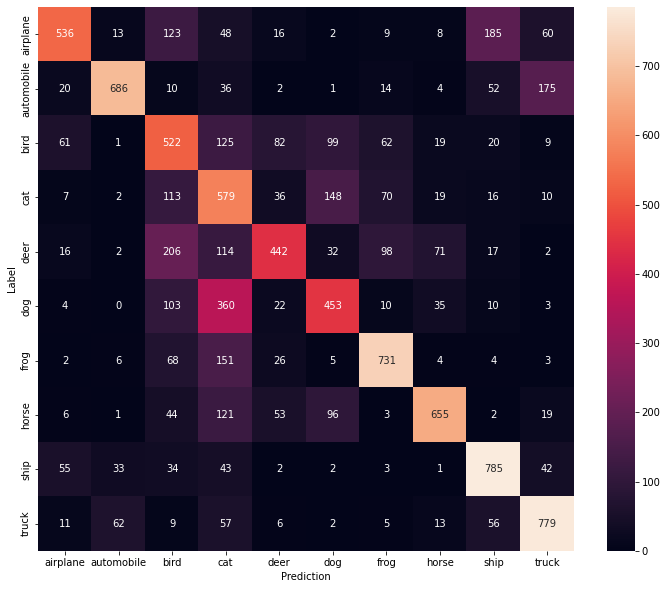

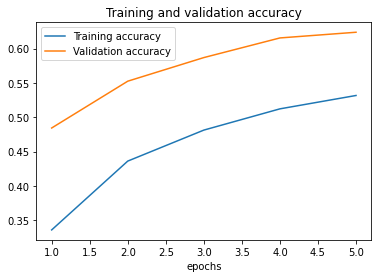

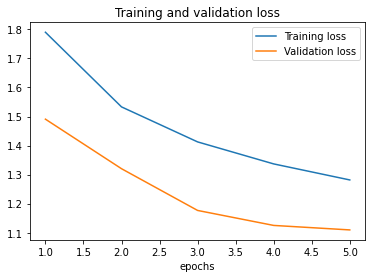

In [ ]:
run_function (test_run2)

### Changing main function
Changing main function to follow more appropriate programming format, i.e. not defining functions inside a main function.

In [4]:
def create_model_pipeline (model_layers = {}, 
                           compiler_parameters = {}, 
                           fit_parameters = {}, 
                           evaluation_parameters = {},
                           prediction_parameters = {},
                           matrix_parameters = {}):
    '''Create pipeline and set model parametres.
    
    The parameters for the create_model_pipeline function are dictionaries 
    containing keyword arguments for the functions listed in the pipeline. As
    all the parameters are dictionaries, the arguments provided must be entered
    using proper dictionary syntax using key-value pairs. The parameter for the 
    individual function in the pipeline will be the key, and the value will be 
    the argument assigned to the parameter.
    
    Example: For compile_model2 (**compiler_parameters)
    compiler_parameters = {'optimizer' : "Adam"}
    Note: optimizer is a string, rather than a variable name, and the use of : 
    and not =, for assigning the value of optimizer.
    '''
    def run_pipeline ():
        '''Delay running pipeline until function is called.'''
        from tensorflow.keras.datasets import cifar10

        data_model = create_pipeline ([get_data,
                                       get_train_test_data,
                                       normalise_data,
                                       create_model (**model_layers),
                                       compile_model2 (**compiler_parameters),
                                       train_model (**fit_parameters),
                                       evaluate_model (**evaluation_parameters),
                                       return_confusion_matrix (prediction_parameters, matrix_parameters),
                                       plot_metrics
                                       ])
        
        data_n_model = data_model (cifar10)

        return data_n_model
    
    return run_pipeline

In [5]:
def run_function (func):
    func ()

In [6]:
def main ():
    model1 = create_model_pipeline (model_layers = {'input_layer': Input (shape = (32, 32, 3)),
                                                    'hidden_layers': [Conv2D (32, kernel_size = (3, 3), activation = "relu"),
                                                                      Conv2D (64, kernel_size = (3, 3), activation = "relu"),
                                                                      MaxPooling2D (pool_size = (2, 2)),
                                                                      Dropout (0.25),
                                                                      Flatten (),
                                                                      Dense (64, activation = "relu"),
                                                                      Dropout (0.5),
                                                                      Dense (10, activation = "softmax")
                                                                      ]
                                                    },
                                    compiler_parameters = {'optimizer': "Adam",
                                                         'loss': "sparse_categorical_crossentropy",
                                                         'metrics': ["sparse_categorical_accuracy"]
                                                         },
                                    fit_parameters = {'batch_size': 32,
                                                    'epochs': 5,
                                                    'validation_split': 0.2
                                                    }
                                    )
    
    run_function (model1)

170508288/170498071 [==============================] - 2s 0us/step
Model compiled for compile_model2
Start model training.
Epoch 1/5
1250/1250 [==============================] - 143s 114ms/step - loss: 1.7379 - sparse_categorical_accuracy: 0.3548 - val_loss: 1.3465 - val_sparse_categorical_accuracy: 0.5298
Epoch 2/5
1250/1250 [==============================] - 142s 113ms/step - loss: 1.4213 - sparse_categorical_accuracy: 0.4791 - val_loss: 1.2166 - val_sparse_categorical_accuracy: 0.5808
Epoch 3/5
1250/1250 [==============================] - 141s 113ms/step - loss: 1.3008 - sparse_categorical_accuracy: 0.5274 - val_loss: 1.0843 - val_sparse_categorical_accuracy: 0.6256
Epoch 4/5
1250/1250 [==============================] - 141s 113ms/step - loss: 1.2107 - sparse_categorical_accuracy: 0.5606 - val_loss: 1.0484 - val_sparse_categorical_accuracy: 0.6423
Epoch 5/5
1250/1250 [==============================] - 140s 112ms/step - loss: 1.1573 - sparse_categorical_accuracy: 0.5828 - val_loss: 1

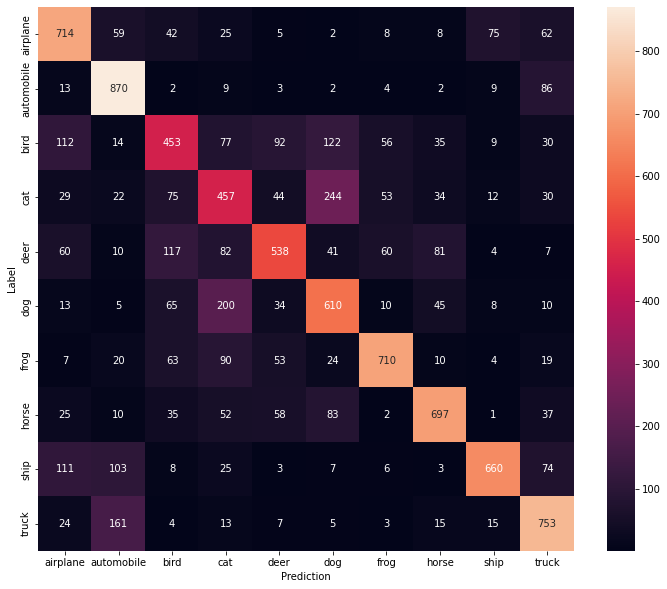

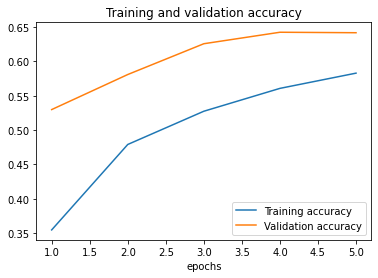

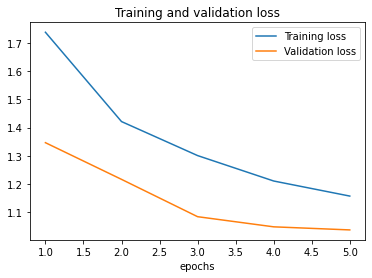

In [7]:
main ()